<a href="https://colab.research.google.com/github/diegochaux/PARCIAL3/blob/main/PARCIAL_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1er PUNTO**

In [1]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

In [2]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 5.9 MB/s eta 0:00:00


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

Teniendo en cuenta la forma canónica:

$$H(s)=\frac{1}{a_2s^2+a_1s+a_0}$$

$$H(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_ns+\omega_n^2}$$

In [4]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*a2*sym.sqrt(ao/a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

In [5]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                      _____________
                     ╱      2      
                    ╱      c       
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m                √m            

Ahora, para sistema subamortiguado:

$$0<\xi<1$$

$$0<\frac{a_1}{2 a_2 \sqrt{\frac {a_0} {a_2}}}<1$$

$$0<\frac{c}{2 m\sqrt{\frac {k} {m}}}<1$$

Asumimos:

$$c=1 = \frac{L}{R}$$

$L = 1$, $R=1$

$$k=1$$

$$m=4 = CL$$

$C=4$

$$\xi = \frac{1}{4}=0.25$$

In [6]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

In [7]:
## Polos y ceros
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.484122918275927*I
p2= -0.125 - 0.484122918275927*I
xi= 0.250000000000000
omega_n= 0.500000000000000


Tiempo de establecimiento

In [8]:
t_s = 6*m / c
print('El tiempo de establecimiento es de: ',t_s.subs(mck))

El tiempo de establecimiento es de:  24.0000000000000


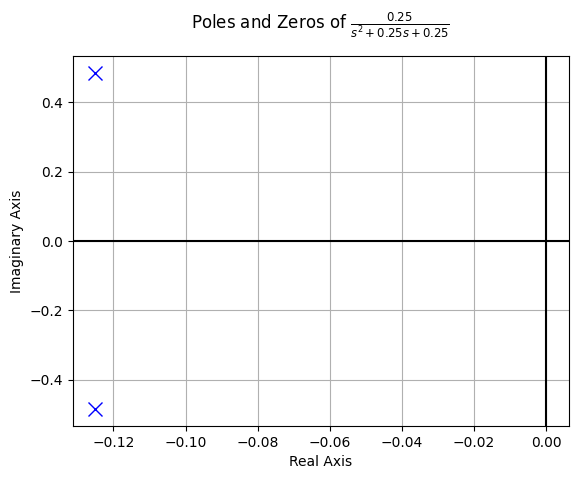

In [9]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
import control as ctrl
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

Diagrama de bode

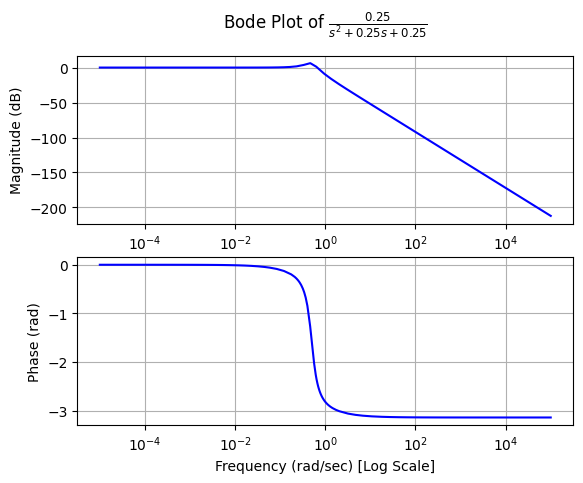

In [10]:
bode_plot(tf1)

Respuesta impulso

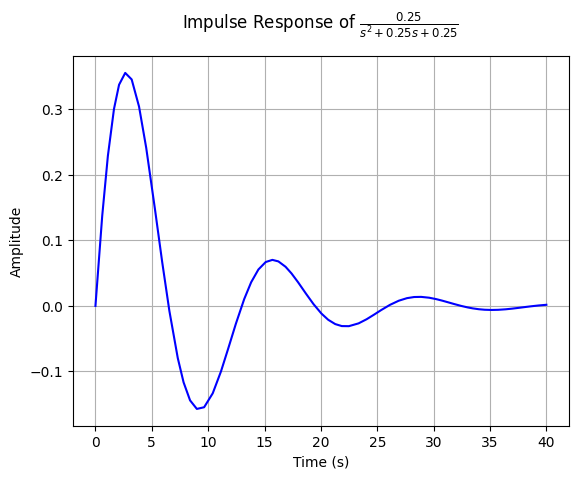

In [11]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Tiempo pico

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

2.8282828282828287

Respuesta al escalón

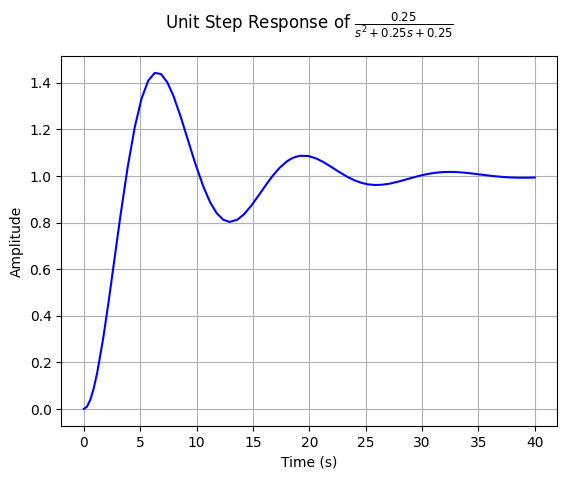

In [13]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Tiempo pico

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import step, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = step((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

6.222222222222223

Respuesta rampa

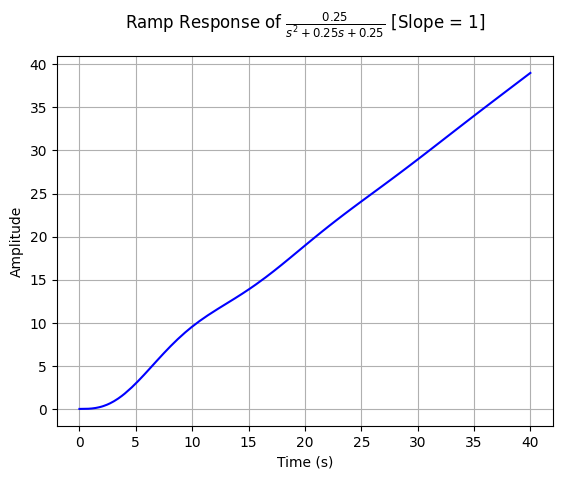

In [15]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Ahora, para sistema de amortiguamiento crítico:

$$\xi=1$$

$$\frac{a_1}{2 a_2 \sqrt{\frac {a_0} {a_2}}}=1$$

$$\frac{c}{2 m\sqrt{\frac {k} {m}}}=1$$

Asumimos:

$$c=2 = \frac{L}{R}$$

$L = 2$, $R=1$

$$k=1$$

$$m=1 = CL$$

$C=\frac{1}{2}$

$$\xi = \frac{2}{2}=1$$

In [16]:
#Reemplazando los valores
mck = {m: 1.0, c: 2.0, k: 1.0}
mck

{c: 2.0, k: 1.0, m: 1.0}

In [17]:
## Polos y ceros
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -1.00000000000000
p2= -1.00000000000000
xi= 1.00000000000000
omega_n= 1.00000000000000


In [18]:
t_s2 = 6*m / c
print('El tiempo de establecimiento es de: ',t_s.subs(mck))

El tiempo de establecimiento es de:  3.00000000000000


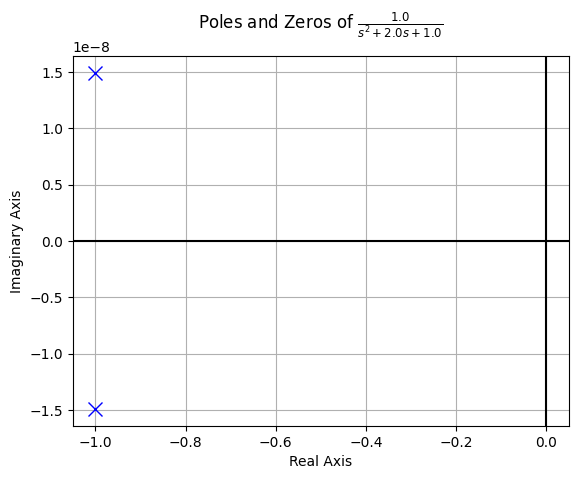

In [19]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

Diagrama de bode

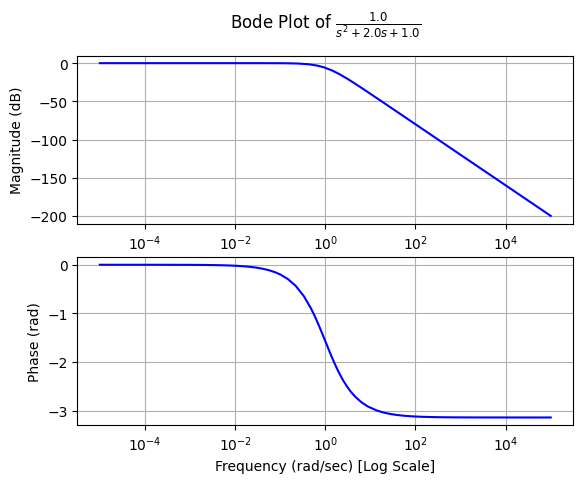

In [20]:
bode_plot(tf1)

Respuesta impulso

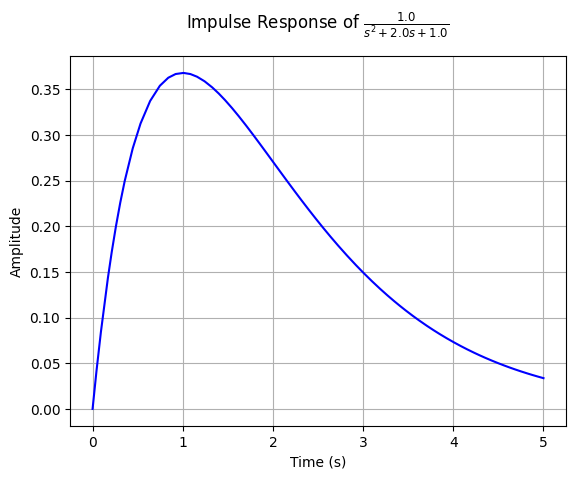

In [21]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Tiempo pico

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [1, 2, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

0.9898989898989898

Respuesta al escalón

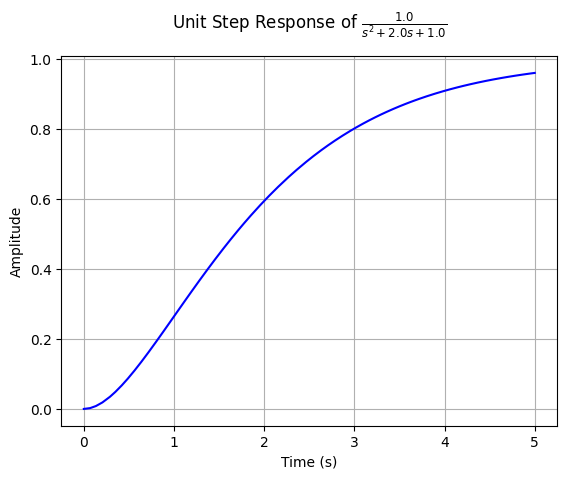

In [23]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Respuesta rampa

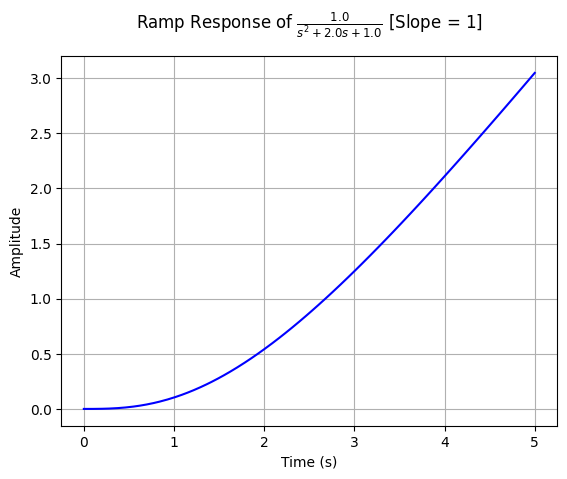

In [24]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Teniendo en cuenta la forma canónica:

$$Hlc(s)=\frac{1}{a_2s^2+a_1s+a_0}$$

$$Hlc(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_ns+\omega_n^2}$$

In [25]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k + 1 # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*a2*sym.sqrt(ao/a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

         1          
────────────────────
  ⎛c⋅s    2   k + 1⎞
m⋅⎜─── + s  + ─────⎟
  ⎝ m           m  ⎠

In [26]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                             ___________________
                            ╱         2         
                _______    ╱         c          
        1.0⋅ⅈ⋅╲╱ k + 1 ⋅  ╱   - ─────────── + 1 
   c                    ╲╱      4⋅m⋅(k + 1)     
- ─── + ────────────────────────────────────────
  2⋅m                      √m                   

Ahora, para sistema subamortiguado:

$$0<\xi<1$$

$$0<\frac{c}{2 m\sqrt{\frac {k+1} {m}}}<1$$

Asumimos:

$$c=1 = \frac{L}{R}$$

$L = 1$, $R=1$

$$k=1$$

$$m=4 = CL$$

$C=4$

$$\xi = \frac{\sqrt{2}}{8}=0.17$$

In [27]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

In [28]:
## Polos y ceros
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.695970545353753*I
p2= -0.125 - 0.695970545353753*I
xi= 0.176776695296637
omega_n= 0.707106781186548


In [29]:
t_s2 = 6*m / c
print('El tiempo de establecimiento es de: ',t_s.subs(mck))

El tiempo de establecimiento es de:  24.0000000000000


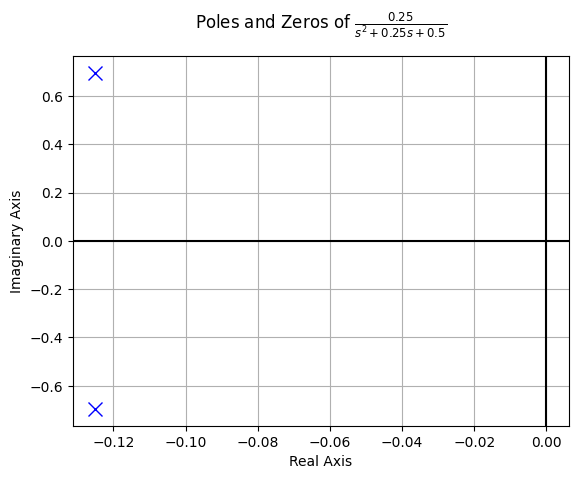

In [30]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

Diagrama de bode

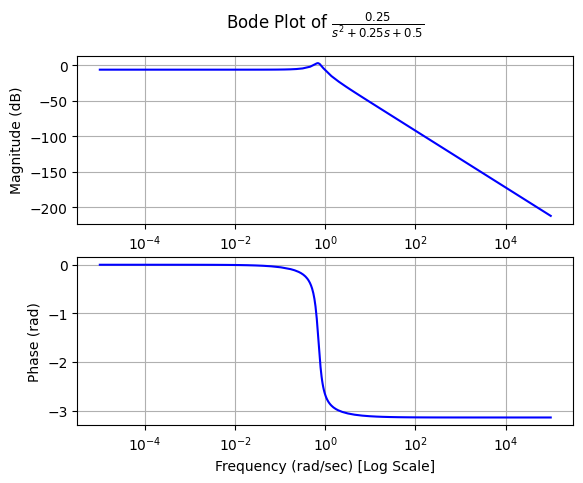

In [31]:
bode_plot(tf1)

Respuesta impulso

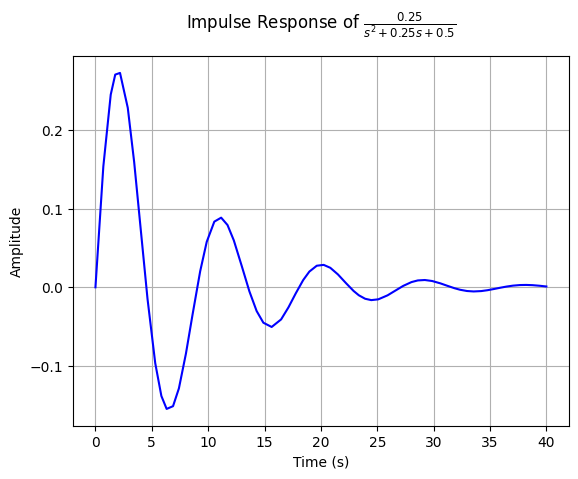

In [32]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Tiempo pico

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 2]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

2.262626262626263

Respuesta al escalón

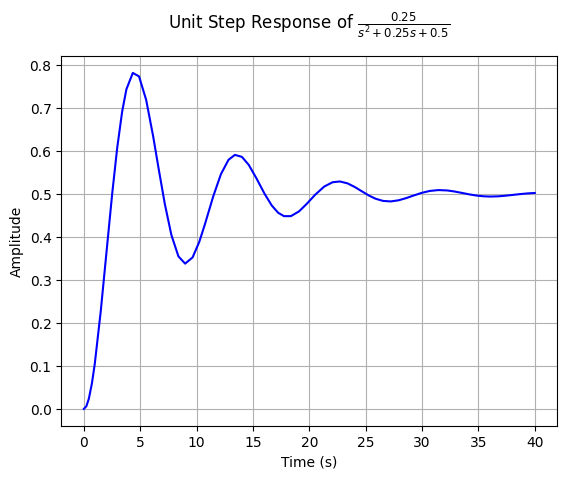

In [34]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Tiempo pico

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import step, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 2]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = step((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

4.525252525252526

Respuesta rampa

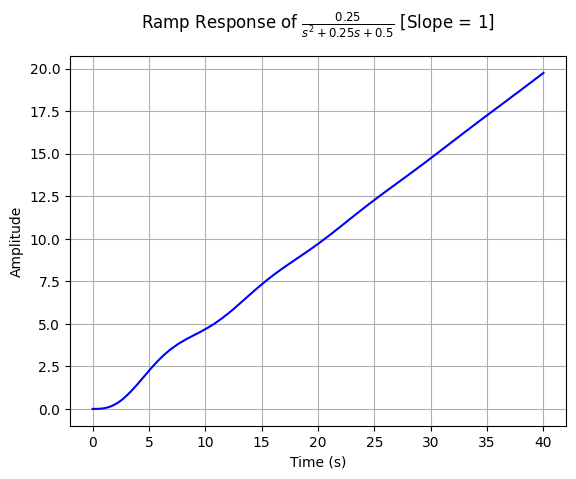

In [36]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Ahora, para sistema de amortiguamiento crítico:

$$\xi=1$$

$$\frac{a_1}{2 a_2 \sqrt{\frac {a_0} {a_2}}}=1$$

$$\frac{c}{2 m\sqrt{\frac {k+1} {m}}}=1$$

Asumimos:

$$c=4 = \frac{L}{R}$$

$L = 8$, $R=2$

$$k=1$$

$$m=2 = CL$$

$C=\frac{1}{4}$

$$\xi = \frac{4}{4}=1$$

In [37]:
#Reemplazando los valores
mck = {m: 2.0, c: 4.0, k: 1.0}
mck

{c: 4.0, k: 1.0, m: 2.0}

In [38]:
## Polos y ceros
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -1.00000000000000
p2= -1.00000000000000
xi= 1.00000000000000
omega_n= 1.00000000000000


In [39]:
t_s2 = 6*m / c
print('El tiempo de establecimiento es de: ',t_s.subs(mck))

El tiempo de establecimiento es de:  3.00000000000000


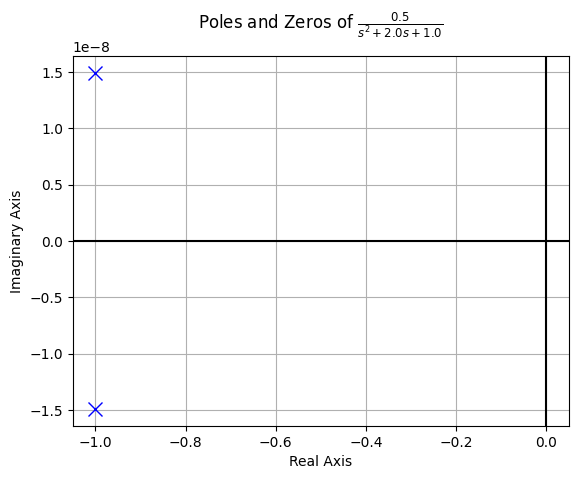

In [40]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

Diagrama de bode

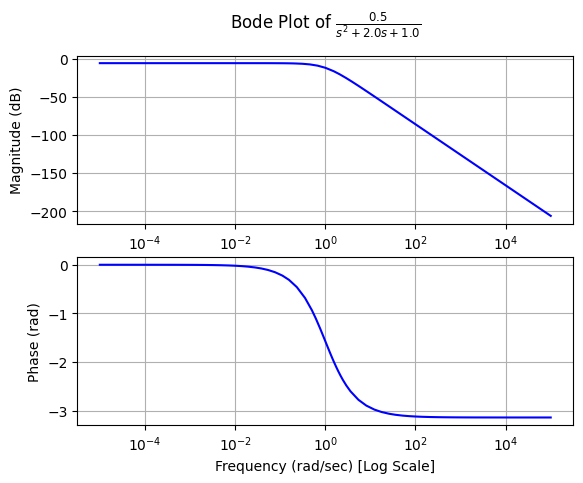

In [41]:
bode_plot(tf1)

Respuesta impulso

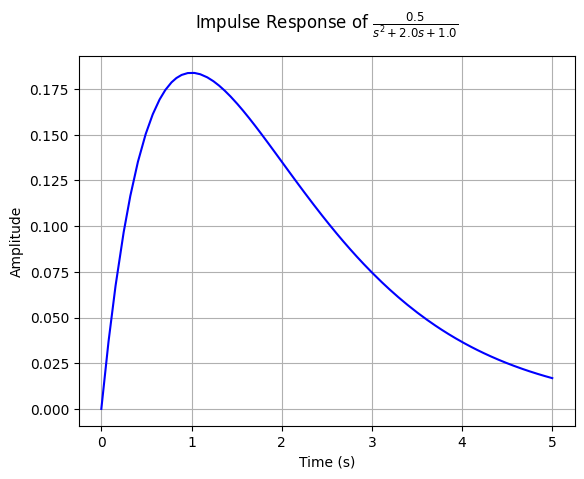

In [42]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Tiempo pico

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [2, 4, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

1.207045198818771

Respuesta al escalón

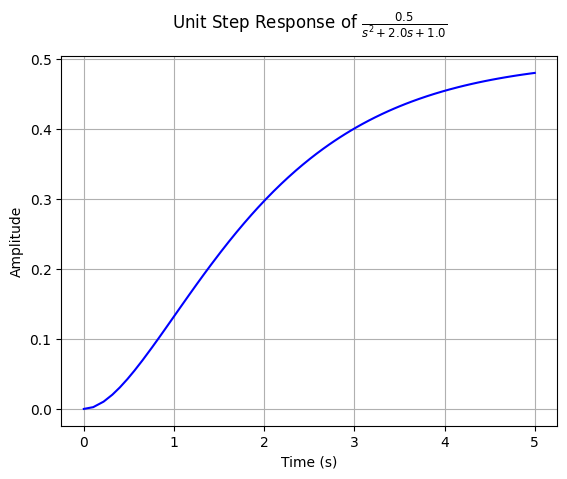

In [44]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Respuesta rampa

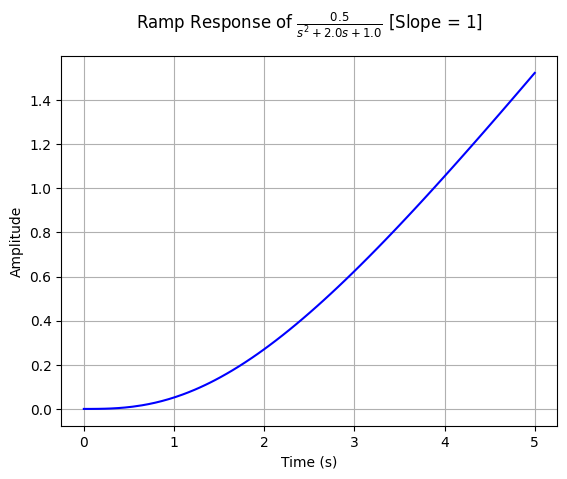

In [45]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**2do PUNTO**

In [46]:
# Para graficar
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

* Desacargamos la Canción de interes:

In [47]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 7.0 MB/s eta 0:00:00
  Created w

In [48]:
link="https://www.youtube.com/watch?v=Ntn1-SocNiY" #link de youtube de la canción
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}  #se utiliza para extraer el audio del video del link de youtube

[youtube] Extracting URL: https://www.youtube.com/watch?v=Ntn1-SocNiY
[youtube] Ntn1-SocNiY: Downloading webpage
[youtube] Ntn1-SocNiY: Downloading ios player API JSON
[youtube] Ntn1-SocNiY: Downloading android player API JSON
[youtube] Ntn1-SocNiY: Downloading m3u8 information
[info] Ntn1-SocNiY: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    3.10MiB in 00:01:06 at 48.02KiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)


In [49]:
!ffmpeg -y -i audio.mp3 output.wav  #para pasar el archivo de formato mp3 a .wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [50]:
!pip install soundfile #instala soundfile en el entorno de python, para manipular audios más fácil

In [51]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [52]:
xpro = x.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 13 #tiempo incio a procesar seg
tf = 18 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [53]:
from IPython.display import Audio #librería para reproducir audio

#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

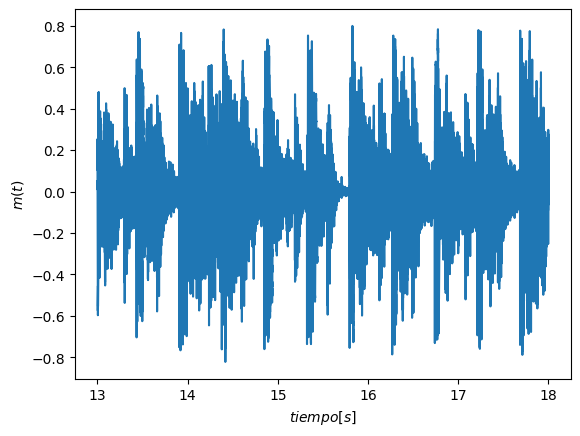

In [55]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.show()

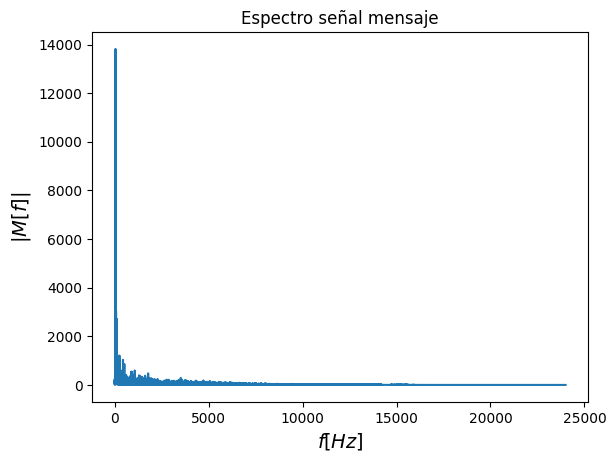

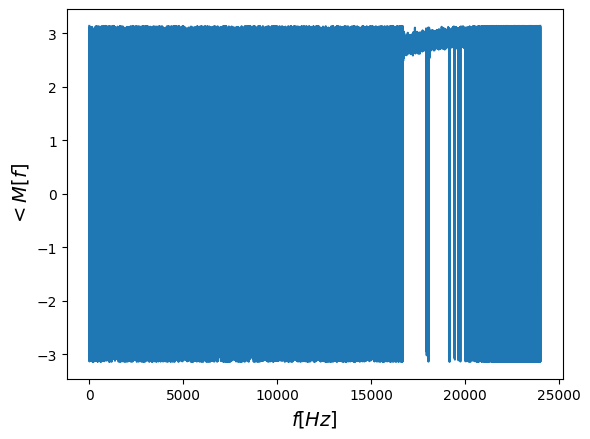

In [56]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

Se fija una $F_o >> F_{max},$ para nuestro caso:

$$\boxed{F_o = 15000 [Hz]}$$


In [57]:
Fc = 15000 #frecuencia portadora
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora

In [58]:
#repoducir portadora
Audio(c,rate=fs)

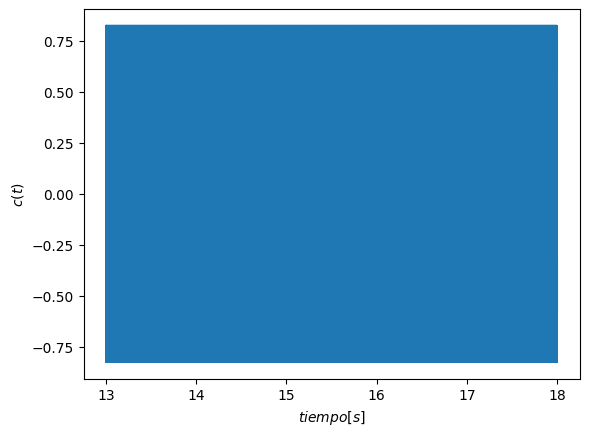

In [59]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

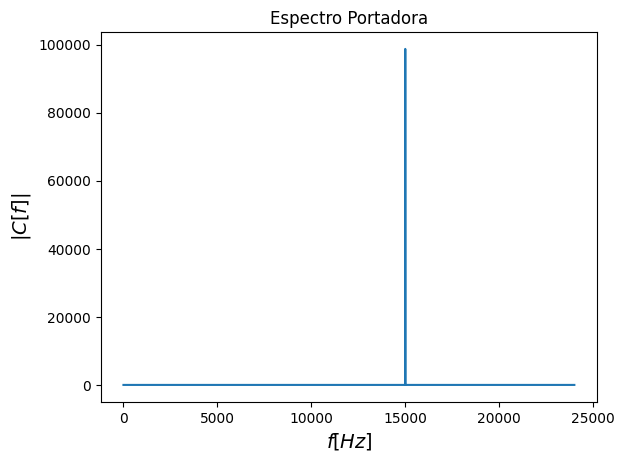

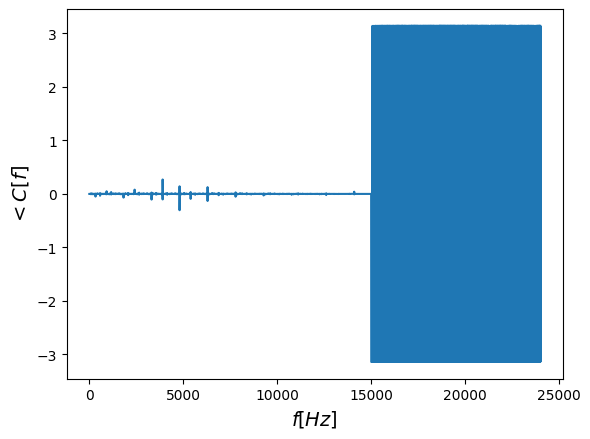

In [60]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

In [61]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [62]:
#repoducir modulada
Audio(y,rate=fs)

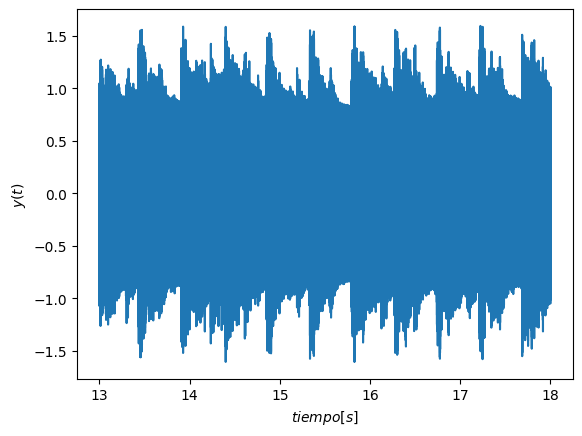

In [63]:
plt.plot(tt,y) #graficar señal modulada en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

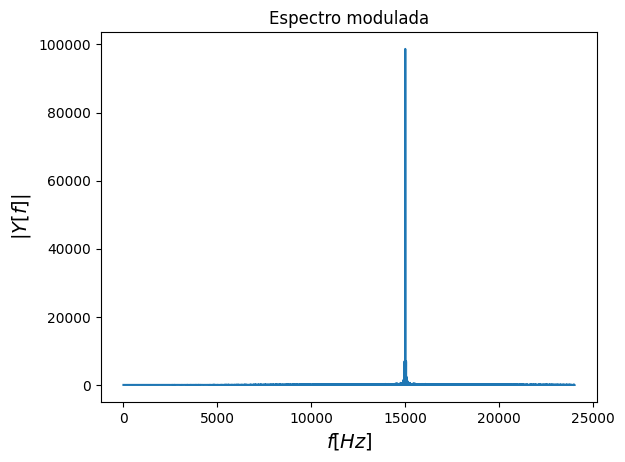

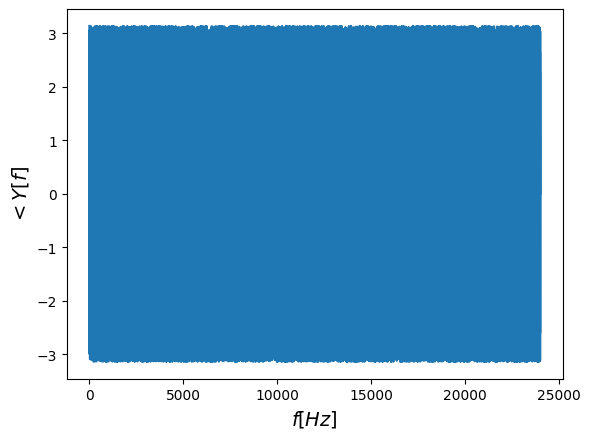

In [64]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

#Demodulando la señal

#Etapa 1: Mixer

In [65]:
d = y*np.cos(2*np.pi*Fc*tt)#señal demodulada
#repoducir señal demodulada
Audio(d,rate=fs)

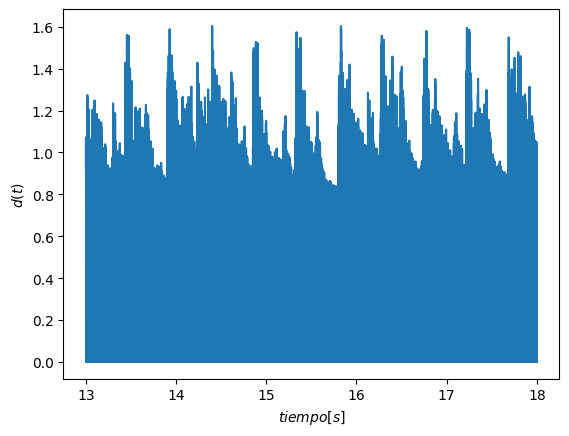

In [66]:
plt.plot(tt,d) #graficar señal demodulada en tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$d(t)$')
plt.show()

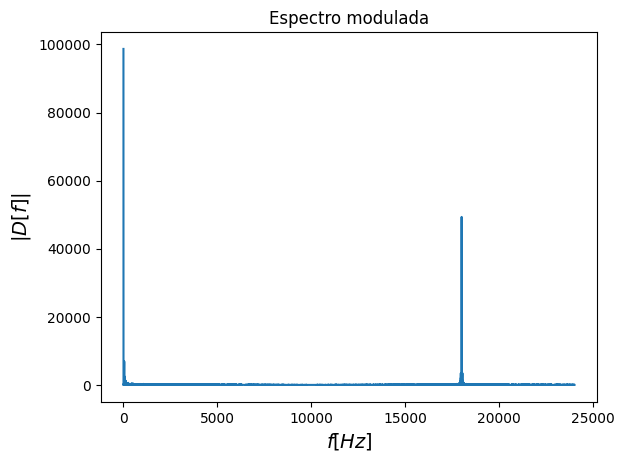

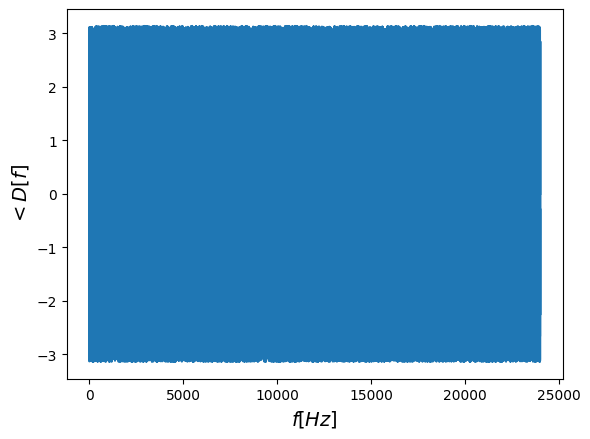

In [67]:
#Fourier señal demodulada
Dw = np.fft.rfft(d) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Dw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|D[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Dw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<D[f]$',fontsize = 14)
plt.show()

#Etapa 2: Filtro pasabajas

In [68]:
from scipy.signal import butter, cheby1, cheby2, bessel, lfilter, freqz, freqz_zpk, filtfilt
import matplotlib.pyplot as plt
import numpy as np

Diseño filtro Butteworth

In [69]:
N = 10 #orden el filtro
Wn = 15000 #banda pasante
filt = 'lowpass' #tipo del filtro (pasa-baja, pasa-alta, pasabanda, rechazabanda)
out = 'zpk' #la funcion retorna los polos y ceros junto con la ganancia. Para usar numerador y denominador usar 'ba' junto con freqz
zeros, poles, gain = butter(N, Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs) #Para indicar la longitud usar worN=K

In [70]:
from matplotlib.patches import Circle
#gráfica polos y ceros
def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()

def show_zp(z, p, title= 'Z-plane'): # Mostrar la ubicación de los polos y los zeros
  ax = plt.gca()

  ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
  ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
  unit_circle = Circle((0,0), radius=1, fill=False,
                        color='black', ls='solid', alpha=0.9)
  ax.add_patch(unit_circle)
  ax.axvline(0, color='0.7')
  ax.axhline(0, color='0.7')

  plt.title(title)
  plt.xlabel(r'Re{$z$}')
  plt.ylabel(r'Im{$z$}')
  plt.axis('equal')
  plt.xlim((-2, 2))
  plt.ylim((-2, 2))
  plt.grid()

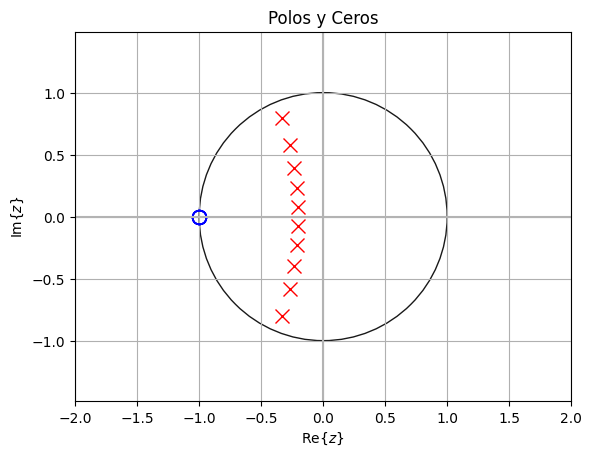

In [71]:
show_zp(zeros, poles, title='Polos y Ceros')#gráfica polos y ceros

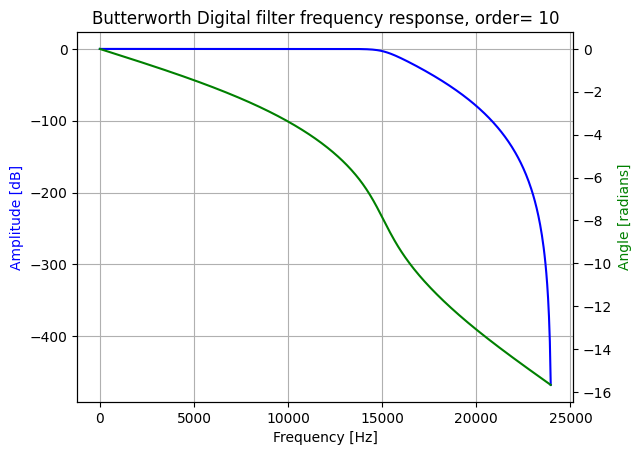

In [72]:
plot_freq_response('Butterworth', w, h, N) #gráfica de bode del filtro

Aplicacion filtro butterworth a la canción

In [73]:
out='ba'
num, den = butter(N, Wn, btype=filt, output=out, fs=fs)
xf = lfilter(num, den, d, axis=0)
Audio(xf,rate=fs) #Audio con ruido filtrado

#Etapa 3: Escalamiento de amplitud

In [74]:
me = (2/Ac)*xf #señal reescalada
Audio(me,rate=fs) #Audio con ruido filtrado

*   Se grafica la señal rescatada en el dominio del teimpo y la frecuencia

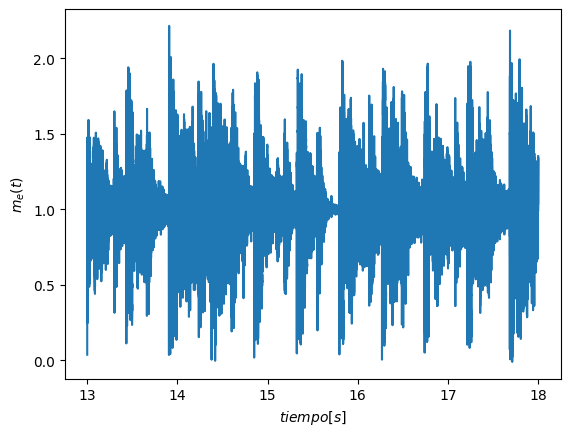

In [75]:
plt.plot(tt,me) #graficar señal recuperada
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

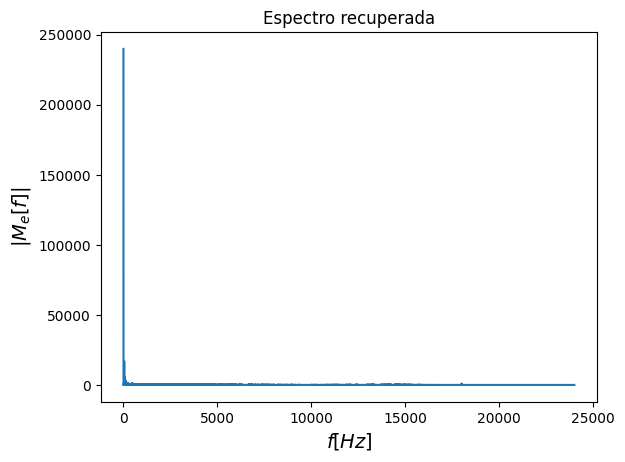

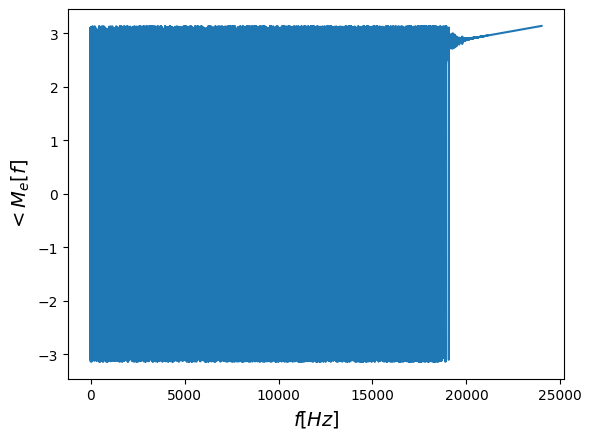

In [76]:
#Fourier señal recuperada
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()

Diseño filtro Bessel

In [77]:
N = 4
out = 'ba'
filt = 'lowpass' #tipo del filtro (pasa-baja, pasa-alta, pasabanda, rechazabanda)
normalization = 'mag' #Ajusta la frecuencia crítica según la respuesta que se desea
num, den = bessel(N, Wn=Wn, btype=filt, norm=normalization, output=out, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
w, h = freqz(num, den, fs=fs)

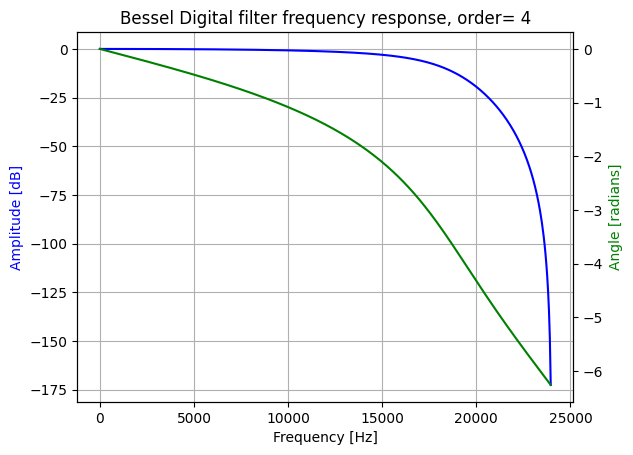

In [78]:
plot_freq_response('Bessel', w, h, N)

Aplicacion filtro bessel a la canción

In [79]:
xf = lfilter(num, den, d, axis=0)
Audio(xf,rate=fs) #Audio con ruido filtrado

Etapa 3: Escalamiento de amplitud

In [80]:
me = (2/Ac)*xf #señal reescalada
Audio(me,rate=fs) #Audio con ruido filtrado

*   Ahora, se grafica la señal rescatada en el dominio del tiempo y de la frecuencia

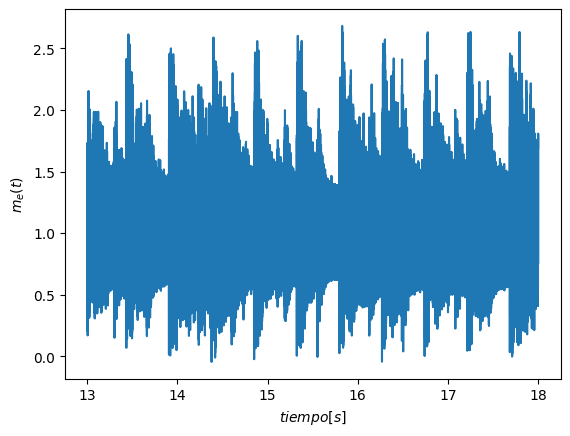

In [81]:
plt.plot(tt,me) #graficar señal recuperada
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

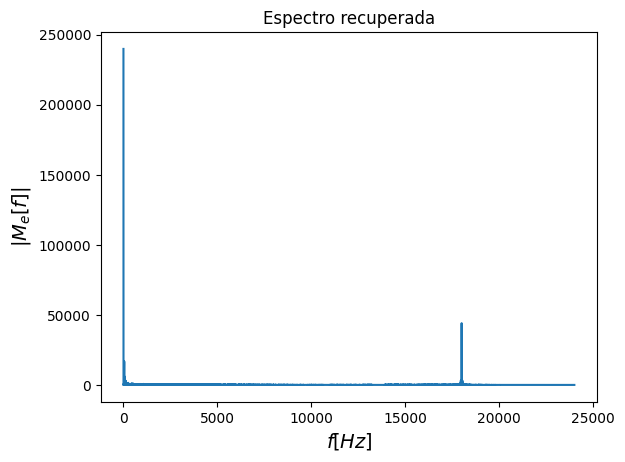

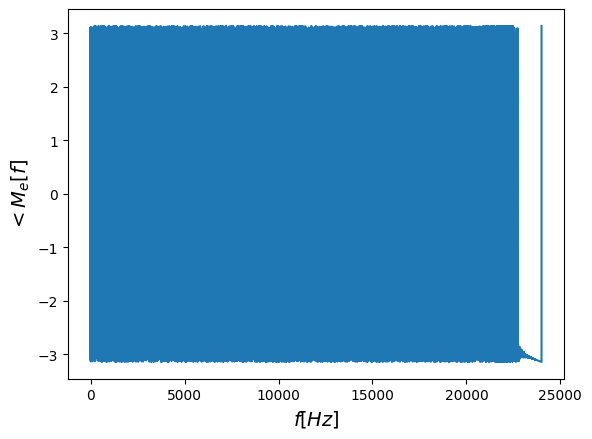

In [82]:
#Fourier señal recuperada
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()

Diseño filtro Chebyshev1

In [83]:
N = 4
ripple = 10
out='zpk'
zeros, poles, gain = cheby1(N, rp=ripple, Wn=Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs)

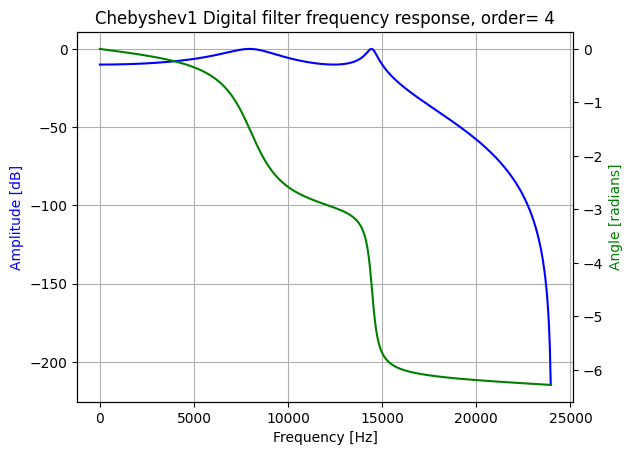

In [84]:
plot_freq_response('Chebyshev1', w, h, N)

Aplicacion filtro chebyshev1 a la canción

In [85]:
out='ba'
num, de= cheby1(N, rp=ripple, Wn=Wn, btype=filt, output=out, fs=fs)
xf = lfilter(num, den, d, axis=0)
Audio(xf,rate=fs) #Audio con ruido filtrado

#Etapa 3: Escalamiento de amplitud

In [86]:
me = (2/Ac)*xf #señal reescalada
Audio(me,rate=fs) #Audio con ruido filtrado

*   Ahora, se grafica la señal recuperada en el dominio del tiempo y de la frecuencia

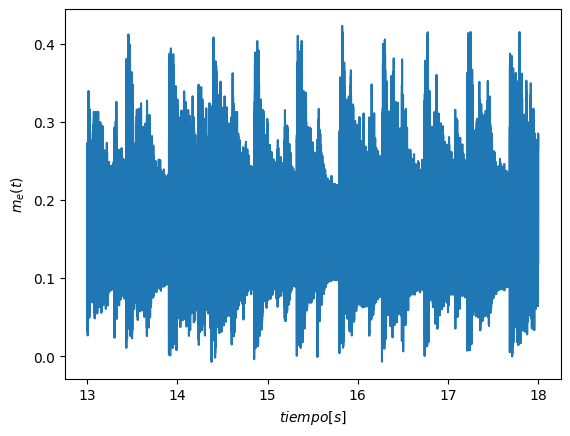

In [87]:
plt.plot(tt,me) #graficar señal recuperada
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

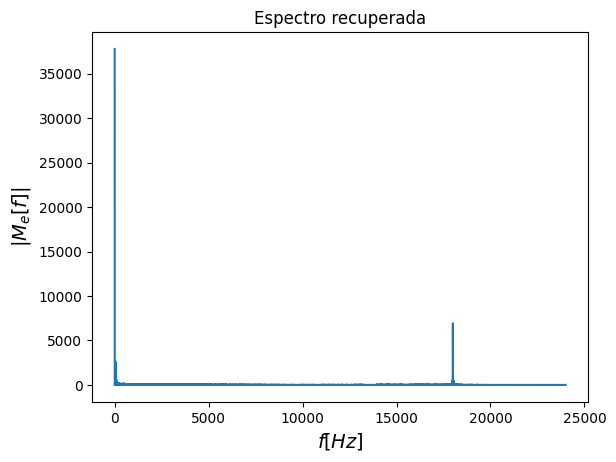

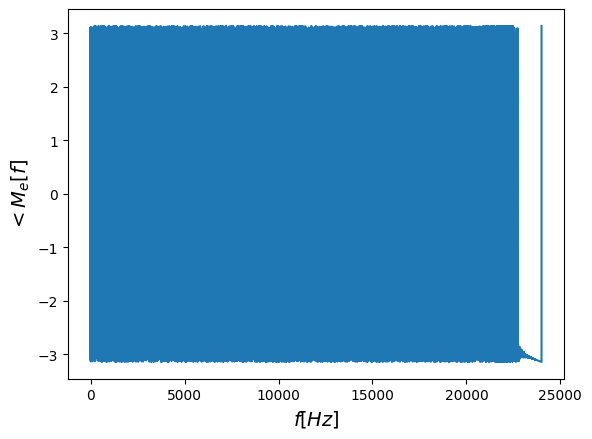

In [88]:
#Fourier señal recuperada
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()

Diseño filtro Chebyshev2

In [89]:
N = 4
ripple = 20
out = 'ba' #no regresa los polos y ceros, sino la funcion de transferencia
num, den = cheby2(N, rs=ripple, Wn=Wn, btype=filt, output=out, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
w, h = freqz(num, den, fs=fs)

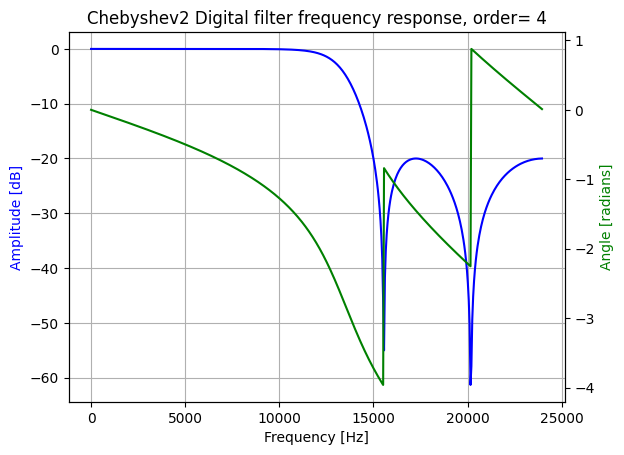

In [90]:
plot_freq_response('Chebyshev2', w, h, N)

Aplicacion filtro chebyshev2 a la canción

In [91]:
xf = lfilter(num, den, d, axis=0)
Audio(xf,rate=fs) #Audio con ruido filtrado

Etapa 3: Escalamiento de amplitud

In [92]:
me = (2/Ac)*xf #señal reescalada
Audio(me,rate=fs) #Audio con ruido filtrado

*   Ahora, se grafica la señal recuperada en el dominio del tiempo y la frecuencia

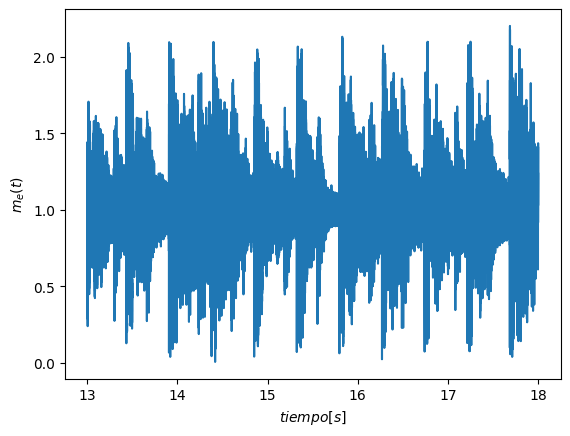

In [93]:
plt.plot(tt,me) #graficar señal recuperada
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

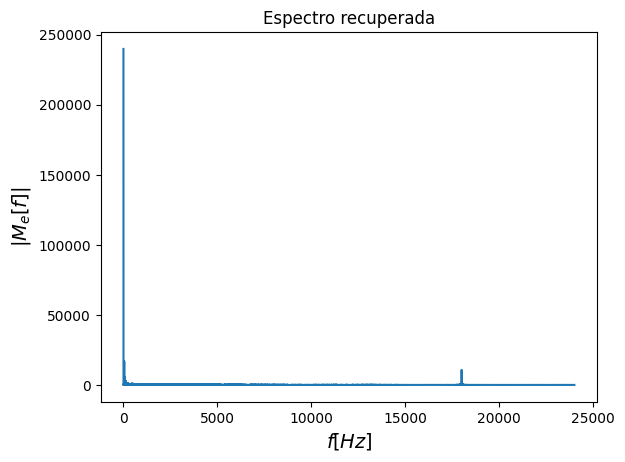

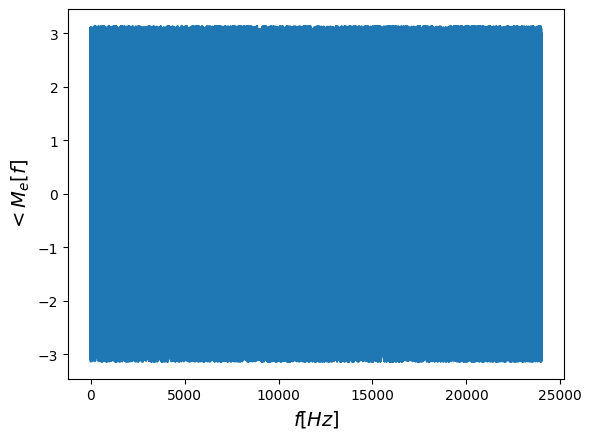

In [94]:
#Fourier señal recuperada
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()